# Q&A Activity on Testing of Hypothesis

1. Carry out descriptive analytics on the dataset.
2. Check whether female and male students scored the same marks.
3. Whether test preparation helps the students?

In [2]:
#Import libraries for basic operations.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Read the dataset to python environment

In [3]:
data = pd.read_csv('Week_8_Q&A_dataset - Sheet1.csv')

In [4]:
data.head()

,Gender,Test preparation,Total Marks
0,male,none,14
1,female,none,28
2,female,none,18
3,female,none,48
4,female,none,21


## 1. Carry out descriptive analytics on the dataset.

In [5]:
# Check for the null values present in the dataset
data.isnull().sum()

Gender              0
Test preparation    0
Total Marks         0
dtype: int64

In [6]:
# Checking columns
data.columns

Index(['Gender', 'Test preparation', 'Total Marks'], dtype='object')

In [7]:
# Descriptive statistics
data.describe()

,Total Marks
count,28.000000
mean,32.321429
std,12.454520
min,12.000000
25%,22.500000
50%,33.000000
75%,43.250000
max,50.000000


In [8]:
#check the percentage of missing data in each columns present in the data
no_of_columns = data.shape[0]
percentage_of_missing_data = data.isnull().sum()/no_of_columns
print(percentage_of_missing_data)

Gender              0.0
Test preparation    0.0
Total Marks         0.0
dtype: float64


In [9]:
# Gender wise descriptive analysis
data.groupby('Gender').describe()

Total Marks                                                      
             count       mean        std   min    25%   50%    75%   max
Gender                                                                  
female        16.0  33.750000  12.865976  12.0  25.50  39.0  43.50  50.0
male          12.0  30.416667  12.168950  14.0  21.75  29.0  43.25  47.0

In [10]:
# Sort the data in ascending order of total marks
data.sort_values(by='Total Marks', ascending=True)
data.sort_index(inplace=False)

,Gender,Test preparation,Total Marks
0,male,none,14
1,female,none,28
2,female,none,18
3,female,none,48
4,female,none,21
5,female,completed,40
6,male,none,30
7,female,none,12
8,male,none,18
9,male,none,24


Text(0.5, 1.0, 'Gender vs Total Marks')

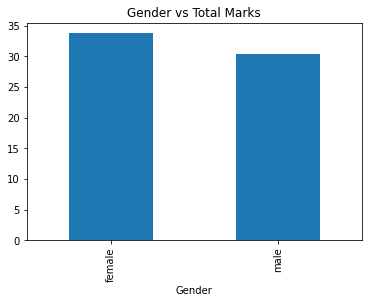

In [11]:
# Gender wise analysis of total marks
data.groupby('Gender')['Total Marks'].mean().plot.bar()
plt.title('Gender vs Total Marks')

Text(0.5, 1.0, 'Test preperation vs Total Marks')

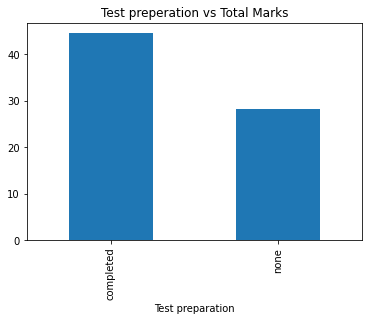

In [12]:
# Analysis of test preparation vs Total Marks
data.groupby('Test preparation')['Total Marks'].mean().plot.bar()
plt.title('Test preperation vs Total Marks')

In [13]:
# Count of male and female
data['Gender'].value_counts()

female    16
male      12
Name: Gender, dtype: int64

## 2. Check whether female and male students scored the same marks.

In [14]:
from scipy import stats
female_score=data[data['Gender']=='female']['Total Marks']
male_score=data[data['Gender']=='male']['Total Marks']
ttest,pvalue=stats.ttest_ind(female_score,male_score)
print("P value is :",pvalue)
print("Test statistic is:",ttest)

if pvalue< 0.05:
    print ('Reject null hypothesis')
else:
    print("failed to reject null hypothesis")

P value is : 0.4937822317960763
Test statistic is: 0.6940885268848668
failed to reject null hypothesis


## 3. Whether test preparation helps the students?

H0: Test preparation has no effect on students performance

H1: Test preparation effected in increasing student's Marks

In [16]:
none=data[data['Test preparation']=='none']['Total Marks']
completed=data[data['Test preparation']=='completed']['Total Marks']
ttest,p_value=stats.ttest_ind(none,completed)
print('p-value',p_value)
if p_value <0.05:
  print("We reject null hypothesis i.e.  Test preparation effected in increasing student's Marks")
else:
  print("We accept null hypothesis i.e.Test preparation has no effect on students performance")

p-value 0.0012671292457320106
We reject null hypothesis i.e.  Test preparation effected in increasing student's Marks
